In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Hey there, 
we start out by importing libraries and data files, and soon will be observing tweets based on time windows



In [122]:
dffoll = pd.read_csv('./followers.csv')
dfuse = pd.read_csv('./users.csv')
dfmis = pd.read_csv('./misinfo_tweets.csv')
dfurl = pd.read_csv('./misinfo_url.csv')
dfhis = pd.read_csv('./tweet_history.csv')
dfuse.head()

C:\Users\sid\AppData\Local\Temp\ipykernel_21472\914569208.py:1: DtypeWarning: Columns (3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  dffoll = pd.read_csv('./followers.csv')
C:\Users\sid\AppData\Local\Temp\ipykernel_21472\914569208.py:5: DtypeWarning: Columns (0,1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dfhis = pd.read_csv('./tweet_history.csv')


,created_at,description,entities,id,location,name,profile_image_url,public_metrics,username,withheld
0,2009-02-25T16:38:24.000Z,De Tweede Kamer is niet bedoeld voor kadaverdi...,{'url': {'urls': [{'display_url': 'waarheid911...,21884690,"Amsterdam, NL - @W911",Frank Ho,https://pbs.twimg.com/profile_images/148784584...,"{'followers_count': 1836, 'following_count': 2...",Holavista,NaN
1,2012-12-31T17:17:24.000Z,habeas corpus (1215),NaN,1050792505,Konstantinopolis/Ayasofya Müze,!Gintaras Mindaugovich Staučė!,https://pbs.twimg.com/profile_images/152379922...,"{'followers_count': 409, 'following_count': 40...",siyahrus,NaN
2,2022-03-26T23:10:57.000Z,Tenaz,NaN,1507857571398389761,"Asuncion, Paraguay",Tukumero Medina Verdun,https://pbs.twimg.com/profile_images/150786320...,"{'followers_count': 3, 'following_count': 308,...",tukumero,NaN
3,2009-07-27T05:10:22.000Z,NaN,NaN,60496486,"Denver, CO USA",Edriss Kironde,https://pbs.twimg.com/profile_images/324683624...,"{'followers_count': 569, 'following_count': 62...",edkay4u,NaN
4,2021-11-06T11:05:49.000Z,NaN,NaN,1456940806099517440,NaN,WTF Is Going On?,https://abs.twimg.com/sticky/default_profile_i...,"{'followers_count': 10, 'following_count': 17,...",WTFIsGo47562610,NaN


In [123]:
dffoll.head()

,created_at,description,entities,id,location,name,profile_image_url,public_metrics,username,withheld,following
0,2022-08-24 17:45:57+00:00,Found different beаuties from аll US stаtes 🙀\...,{'description': {'urls': [{'display_url': 'wq....,1562496375262412800.0,"Hialeah, FL",Fiona Brooks,https://pbs.twimg.com/profile_images/156454892...,"{'followers_count': 1, 'following_count': 144,...",FionaybBrooks,NaN,['1050792505']
1,2012-09-21 14:35:23+00:00,"""yani bir aynanın önünde yürür gibi\nayna bitt...",NaN,837919194.0,NaN,ender ondes,https://pbs.twimg.com/profile_images/574879995...,"{'followers_count': 5654, 'following_count': 2...",enderondes,NaN,['1050792505']
2,2022-02-02 18:01:43+00:00,Bahsin yeni adresi 👇\n50 TL deneme bonusu 🔥\nH...,{'url': {'urls': [{'display_url': 'rebrand.ly/...,1488935597972594688.0,NaN,Betist,https://pbs.twimg.com/profile_images/148902393...,"{'followers_count': 642, 'following_count': 25...",betist2022,NaN,['1050792505']
3,2010-10-04 23:15:47+00:00,"Macera değil, yaşamak, sade yaşamak\n\nDört Me...",{'url': {'urls': [{'display_url': 'mehtapsokak...,198673057.0,NaN,deniz faruk zeren,https://pbs.twimg.com/profile_images/155983642...,"{'followers_count': 1781, 'following_count': 1...",mehtapsokakno1,NaN,['1050792505']
4,2019-05-31 16:37:15+00:00,"🥂Hayat gerçekten basit, ama biz bunu karmaşık ...",NaN,1134499087951302784.0,"Cologne, Germany",Cenk Bora 🇹🇷,https://pbs.twimg.com/profile_images/153918865...,"{'followers_count': 2281, 'following_count': 1...",BuzunprensiTR,NaN,['1050792505']


In [124]:
dfhis.head()

,author_id,conversation_id,created_at,entities,id,lang,possibly_sensitive,public_metrics,text,referenced_tweets,withheld
0,1492441873495040000,1564550772108496896,2022-08-30 09:49:06+00:00,"{'annotations': [{'end': 5, 'normalized_text':...",1.564551e+18,en,False,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",Parker is one of the best Manager in the world...,NaN,NaN
1,1492441873495040000,1564550402959458304,2022-08-30 09:47:38+00:00,"{'annotations': [{'end': 37, 'normalized_text'...",1.564550e+18,en,False,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",Man city is billion pounds not in Euro or Doll...,NaN,NaN
2,1492441873495040000,1564549997890256896,2022-08-30 09:46:02+00:00,"{'annotations': [{'end': 20, 'normalized_text'...",1.564550e+18,en,False,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",I don't know why Club owners can't have patien...,NaN,NaN
3,1492441873495040000,1564548982356992000,2022-08-30 09:41:59+00:00,"{'annotations': [{'end': 47, 'normalized_text'...",1.564549e+18,en,False,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",The world majority are solidly behind PAPA PUT...,NaN,NaN
4,1492441873495040000,1564509461406007296,2022-08-30 07:04:57+00:00,"{'annotations': [{'end': 79, 'normalized_text'...",1.564509e+18,en,False,"{'like_count': 0, 'quote_count': 0, 'reply_cou...","Yoruba parents.\nSaturday Home game,I should b...",NaN,NaN


In [125]:
dfmis.head()

,author_id,conversation_id,created_at,entities,id,lang,possibly_sensitive,public_metrics,text,withheld,uuid
0,1420458337116770304,1509511253395390464,2022-03-31 12:41:42+00:00,"{'annotations': [{'end': 12, 'normalized_text'...",1509511253395390464,en,True,"{'like_count': 3, 'quote_count': 0, 'reply_cou...",Great Britain Imposes Sanctions Against Sputni...,NaN,de994cd1-279c-4746-b150-b6812ef5216f
1,93834203,1509474192768397312,2022-03-31 10:14:26+00:00,"{'urls': [{'description': '31.03.2022, Sputnik...",1509474192768397312,en,False,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",BREAKING NEWS\n\nhttps://t.co/vt784V6NqS,NaN,de994cd1-279c-4746-b150-b6812ef5216f
2,34262462,1509473098482929664,2022-03-31 10:10:05+00:00,"{'annotations': [{'end': 12, 'normalized_text'...",1509473098482929664,en,False,"{'like_count': 2, 'quote_count': 1, 'reply_cou...",Great Britain Imposes Sanctions Against Sputni...,"{'copyright': False, 'country_codes': ['AT', '...",de994cd1-279c-4746-b150-b6812ef5216f
3,27076961,1509472817053581312,2022-03-31 10:08:58+00:00,"{'urls': [{'description': '31.03.2022, Sputnik...",1509472817053581312,zxx,False,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",https://t.co/Sc2veAV0Vt,NaN,de994cd1-279c-4746-b150-b6812ef5216f
4,34262462,1509472769901215744,2022-03-31 10:08:47+00:00,"{'annotations': [{'end': 24, 'normalized_text'...",1509472769901215744,en,False,"{'like_count': 10, 'quote_count': 0, 'reply_co...",#BREAKING | Great Britain imposes sanctions ag...,"{'copyright': False, 'country_codes': ['AT', '...",de994cd1-279c-4746-b150-b6812ef5216f


In [126]:
dfmis['created_at'].value_counts()

created_at
2022-04-01 10:31:08+00:00    2
2022-03-31 12:41:42+00:00    1
2022-04-01 00:32:30+00:00    1
2022-03-31 15:37:34+00:00    1
2022-04-18 01:32:24+00:00    1
                            ..
2022-04-01 11:56:50+00:00    1
2022-04-01 08:52:00+00:00    1
2022-04-01 08:00:54+00:00    1
2022-04-01 06:36:40+00:00    1
2022-03-31 17:53:39+00:00    1
Name: count, Length: 217, dtype: int64

In [127]:
print(dfhis['created_at'][0], pd.to_datetime(dfhis['created_at'][0]))

2022-08-30 09:49:06+00:00 2022-08-30 09:49:06+00:00


## the code snippet right below makes it quite obivious that we need to narrow down our time window

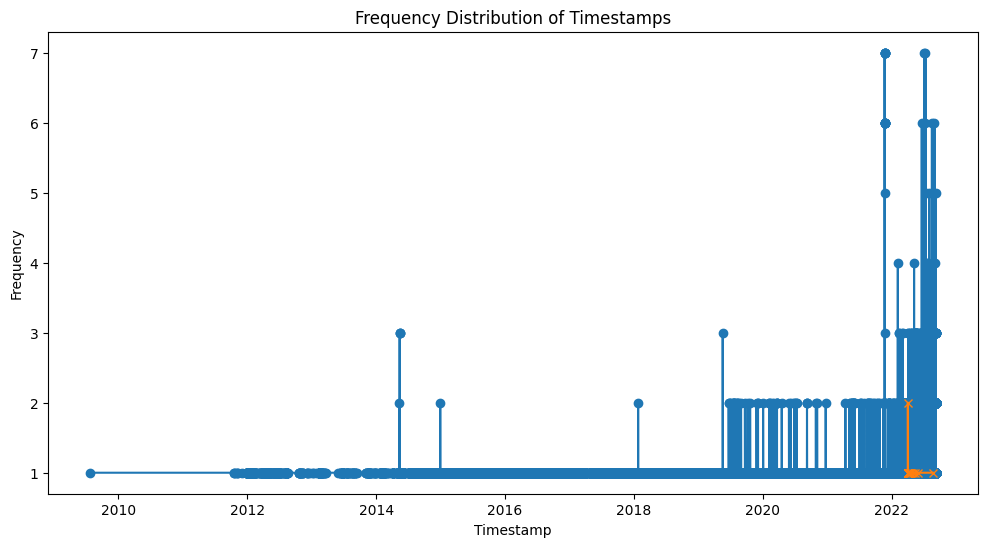

In [128]:
dfhis['created_at'] = pd.to_datetime(dfhis['created_at'])
dfmis['created_at'] = pd.to_datetime(dfmis['created_at'])
timestamp_counts1 = dfhis['created_at'].value_counts().sort_index()
timestamp_counts2= dfmis['created_at'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
plt.plot(timestamp_counts1.index, timestamp_counts1.values, marker='o', linestyle='-')
plt.plot(timestamp_counts2.index, timestamp_counts2.values, marker='x', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Timestamps')
plt.show()


# Here, unlike the graph above we are interested in tweets posted in and after year 2022

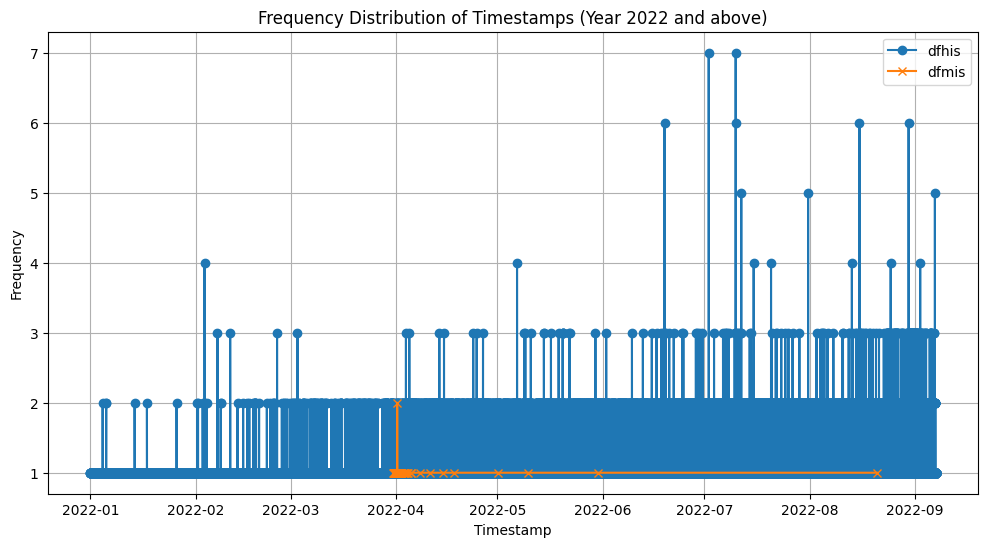

In [129]:
# Filter entries from the year 2022 and above
dfhis_filtered = dfhis[dfhis['created_at'].dt.year >= 2022]
dfmis_filtered = dfmis[dfmis['created_at'].dt.year >= 2022]

# Count the occurrences of each timestamp for the filtered DataFrames
timestamp_counts1 = dfhis_filtered['created_at'].value_counts().sort_index()
timestamp_counts2 = dfmis_filtered['created_at'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))

# Plot the frequency distribution for dfhis
plt.plot(timestamp_counts1.index, timestamp_counts1.values, marker='o', linestyle='-', label='dfhis')

# Plot the frequency distribution for dfmis
plt.plot(timestamp_counts2.index, timestamp_counts2.values, marker='x', linestyle='-', label='dfmis')

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Timestamps (Year 2022 and above)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


# Observation!!!
hence, by the the graph it's a no brainer that most of amount of misinformation/fake news infested tweets were posted on around April of 2022. Therefore we will be carrying out are data analysis accordinly with a special focus on tweets of April 2022